In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('E:/portneuf/analysis/utils/'))
import trend_sen

In [10]:
df = pd.read_csv('gridMET_HUC12_monthly_stats.csv')
df['tmmn'] = df['tmmn'] - 273.15
df['tmmx'] = df['tmmx'] - 273.15
df['tmean'] = df[['tmmn', 'tmmx']].mean(axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13800 non-null  object 
 1   huc12   13800 non-null  int64  
 2   pr      13800 non-null  float64
 3   etr     13800 non-null  float64
 4   tmmn    13800 non-null  float64
 5   tmmx    13800 non-null  float64
 6   tmean   13800 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 754.8+ KB


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [13]:
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [14]:
df

,Date,huc12,pr,etr,tmmn,tmmx,tmean,month,year,irr_year
0,1999-01-01,170402080608,39.060099,29.871449,-5.685159,2.423049,-1.631055,1,1999,1999
1,1999-01-01,170402080102,64.428112,25.744536,-7.654450,0.231969,-3.711241,1,1999,1999
2,1999-01-01,170402080104,102.146274,25.714261,-7.768679,-0.601728,-4.185203,1,1999,1999
3,1999-01-01,170402080106,53.634767,27.612401,-7.442584,-0.207157,-3.824871,1,1999,1999
4,1999-01-01,170402080107,45.239523,31.851244,-7.942996,0.459019,-3.741989,1,1999,1999
...,...,...,...,...,...,...,...,...,...,...
13795,2023-12-01,170402080401,65.066793,29.867497,-7.340612,2.147381,-2.596615,12,2023,2024
13796,2023-12-01,170402080403,84.826814,29.918535,-7.078321,1.851950,-2.613186,12,2023,2024
13797,2023-12-01,170402080205,68.954814,29.568637,-8.488046,1.056108,-3.715969,12,2023,2024
13798,2023-12-01,170402080402,97.918302,29.801979,-6.108928,1.953337,-2.077796,12,2023,2024


In [15]:
df = df[(df['irr_year'] >= 2000) & (df['irr_year'] <= 2023)]

In [16]:
df.tail()

,Date,huc12,pr,etr,tmmn,tmmx,tmean,month,year,irr_year
13703,2023-10-01,170402080401,45.509426,103.514572,1.042783,15.741040,8.391911,10,2023,2023
13704,2023-10-01,170402080403,53.984908,100.196190,1.187264,14.787197,7.987231,10,2023,2023
13705,2023-10-01,170402080205,56.562155,100.595233,1.053164,14.432425,7.742795,10,2023,2023
13706,2023-10-01,170402080402,59.579884,91.858285,1.691843,13.703880,7.697861,10,2023,2023
13707,2023-10-01,170402080404,60.025635,96.552687,1.334088,14.371843,7.852966,10,2023,2023


In [17]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [19]:
var_cols = ['pr', 'etr', 'tmmn', 'tmmx', 'tmean']


In [20]:
df_irr_yr = df.groupby(['huc12', 'irr_year',])[var_cols].sum().reset_index() 
df_cs_yr = df_cs.groupby(['huc12', 'year',])[var_cols].sum().reset_index() 
df_non_cs_yr = df_non_cs.groupby(['huc12', 'year',])[var_cols].sum().reset_index()

In [21]:
df_irr_yr

,huc12,irr_year,pr,etr,tmmn,tmmx,tmean
0,170402080101,2000,386.161171,1622.965989,4.320921,171.079337,87.700129
1,170402080101,2001,281.120027,1587.927576,-10.772984,158.578622,73.902819
2,170402080101,2002,409.171374,1500.199588,-14.580261,147.367457,66.393598
3,170402080101,2003,329.407744,1577.909530,9.741915,170.953230,90.347573
4,170402080101,2004,560.963109,1408.990606,-0.526514,148.777097,74.125292
...,...,...,...,...,...,...,...
1099,170402080608,2019,329.882140,1591.675847,5.491853,171.543725,88.517789
1100,170402080608,2020,236.136530,1696.311027,12.568616,191.813022,102.190819
1101,170402080608,2021,253.283099,1730.514505,21.332815,196.041959,108.687387
1102,170402080608,2022,233.494216,1610.280851,10.434845,187.155443,98.795144


In [34]:
trend_df_irr = trend_sen.analyze_trends(df_irr_yr, var_list = var_cols, sort_yr='irr_year') 

In [37]:
summary_df_irr = trend_sen.summarize_trends(trend_df_irr, var_cols)

In [39]:
summary_df_irr

,Variable,Increasing,Decreasing,No Trend
0,pr,25,0,21
1,etr,0,0,46
2,tmmn,0,0,46
3,tmmx,0,1,45
4,tmean,0,0,46


In [40]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [41]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df_irr['huc12'] = trend_df_irr['huc12'].astype(str)

In [42]:
merged_gdf_cs = gdf.merge(trend_df_irr, left_on='huc12', right_on='huc12')

Saved: graphics/pr_irr_year_trend_map.png


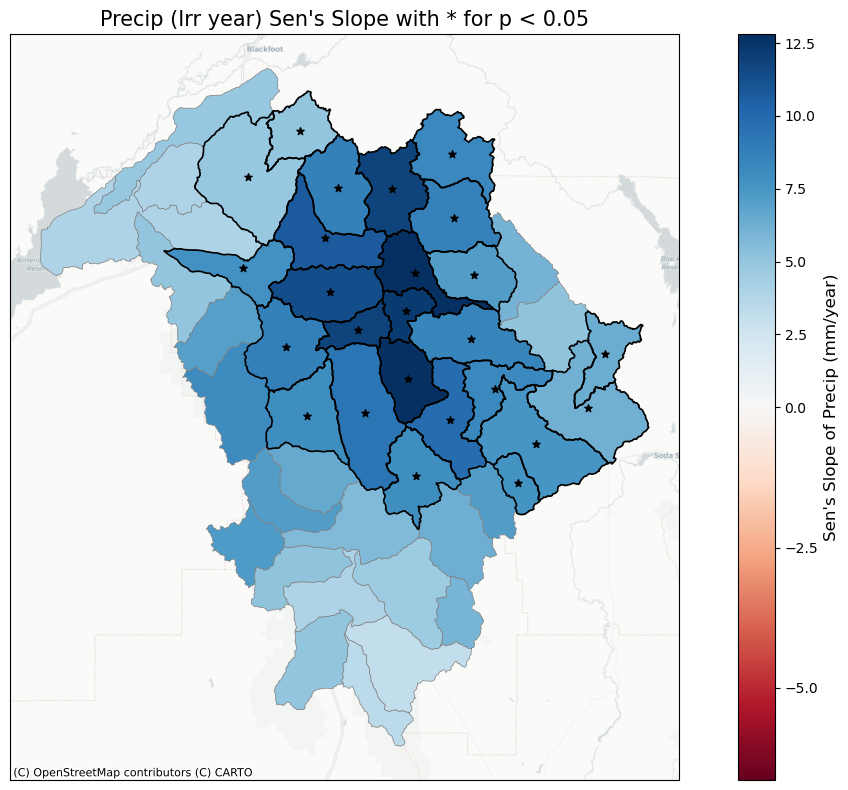

Saved: graphics/etr_irr_year_trend_map.png


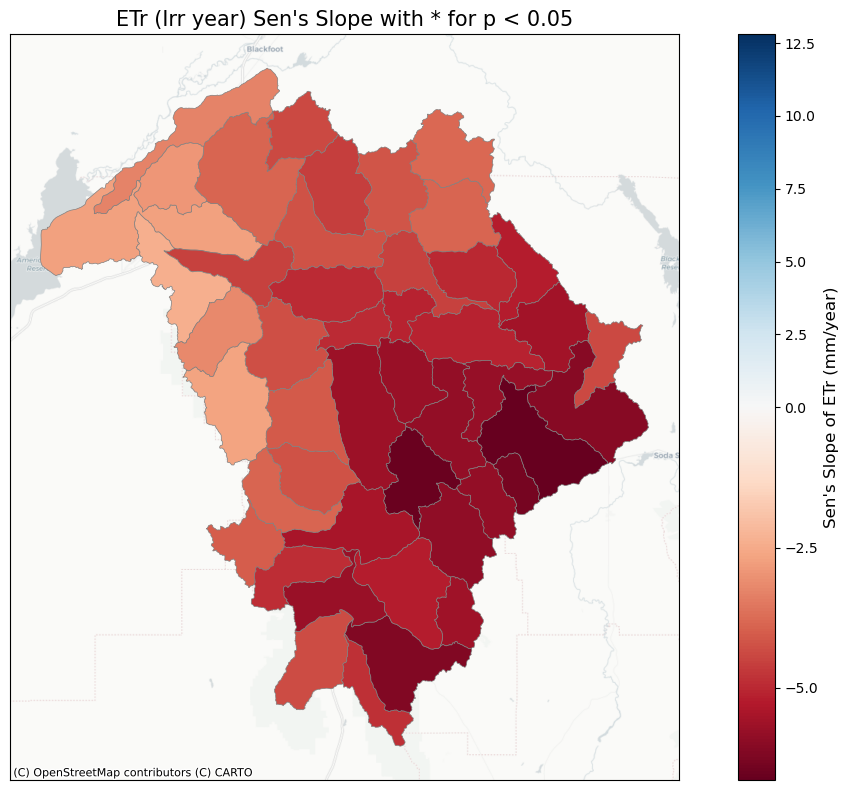

In [49]:
plot_cols = {'pr': 'Precip', 'etr': 'ETr'}
all_slopes = merged_gdf_cs[[f'{col}_slope' for col in plot_cols]].values.flatten()
vmin, vmax = np.percentile(all_slopes[~np.isnan(all_slopes)], [1, 99])

for var in plot_cols.keys():
    trend_sen.plot_trend_map(
        gdf=merged_gdf_cs,
        slope_col=f'{var}_slope',
        pval_col=f'{var}_p',
        title=f"{plot_cols.get(var, var)} (Irr year) Sen's Slope with * for p < 0.05",
        cbar_label=f"Sen's Slope of {plot_cols.get(var, var)} (mm/year)",
        vmin=vmin,
        vmax=vmax,
        cmap= 'RdBu',
        center_zero=True,
        show_significance_border=True,
        show_significance_marker=True,
        basemap=True,
        save_path=f'graphics/{var}_irr_year_trend_map.png',
    )

In [43]:
trend_df_irr

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend,tmean_slope,tmean_p,tmean_trend
0,170402080101,8.299112,0.014064,increasing,-3.827014,0.224208,no trend,0.335898,0.286157,no trend,-0.388151,0.333358,no trend,0.075095,0.940682,no trend
1,170402080102,8.656854,0.016127,increasing,-3.883613,0.243693,no trend,0.204086,0.413046,no trend,-0.379440,0.264337,no trend,-0.036673,0.940682,no trend
2,170402080103,12.258248,0.023996,increasing,-5.125060,0.157406,no trend,-0.082959,0.784970,no trend,-0.553639,0.130262,no trend,-0.275596,0.309163,no trend
3,170402080104,12.707345,0.018452,increasing,-4.552167,0.172491,no trend,-0.033035,0.901298,no trend,-0.456889,0.188633,no trend,-0.172328,0.535185,no trend
4,170402080105,7.170385,0.018452,increasing,-5.015205,0.205863,no trend,0.185965,0.471939,no trend,-0.346717,0.264337,no trend,0.019359,0.980211,no trend
5,170402080106,6.077045,0.050049,no trend,-5.207419,0.118128,no trend,0.083224,0.709844,no trend,-0.528941,0.224208,no trend,-0.111167,0.784970,no trend
6,170402080107,5.148479,0.050049,no trend,-5.594649,0.130262,no trend,0.212151,0.535185,no trend,-0.478244,0.188633,no trend,-0.063744,0.901298,no trend
7,170402080108,8.494704,0.016127,increasing,-5.087308,0.172491,no trend,0.071109,0.823349,no trend,-0.367548,0.172491,no trend,-0.114184,0.747106,no trend
8,170402080201,6.394645,0.030929,increasing,-4.391807,0.224208,no trend,0.302647,0.385310,no trend,-0.413293,0.224208,no trend,-0.049346,0.940682,no trend
9,170402080202,6.170398,0.018452,increasing,-6.053918,0.106900,no trend,0.216613,0.568338,no trend,-0.492142,0.188633,no trend,-0.105124,0.901298,no trend
